<a href="https://colab.research.google.com/github/aaziblim/Learning-Journey/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression


In [40]:
oecd_bli = pd.read_csv("/content/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [ ]:
gdp_per_capita

In [43]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [44]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [65]:
X = X.ravel()
X.shape

(29,)

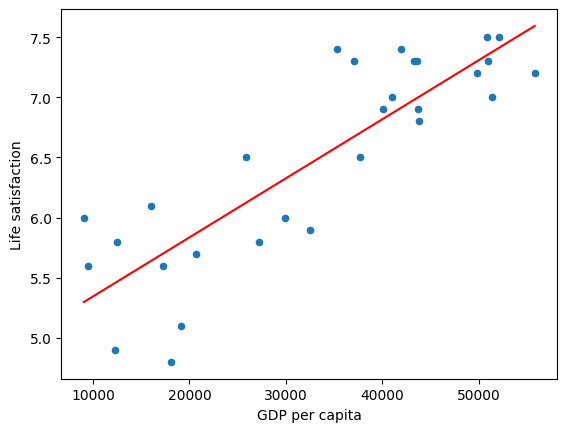

In [68]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
fit = np.polyfit(X, y, 1)
y_line = fit[1] + fit[0] * X

# Plotting the data points and the best fit line
plt.plot(X, y_line, 'r')
plt.show()

In [ ]:
X = X.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

In [ ]:
X_new = [[262892]]  # Cyprus' GDP per capita
print(reg.predict(X_new)) # outputs [[ 5.96242338]]